<a href="https://colab.research.google.com/github/divoilhamdi/Pemograman_Python/blob/main/AdeAsrining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [3]:
ls

 3scene@                         'Copy of dataset'@             nnmodel_scene/
'Ade Asrining_1101194121.ipynb'   dataset/                      Untitled0.ipynb
 best_weight_scene_mobileNet.h5   IMG_20200814_131553_HDR.jpg   Untitled1.ipynb
 coast_art1130.jpg                IMG_20200814_133326_HDR.jpg


In [4]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [5]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [6]:
for imagePath in imagePaths:
	image = Image.open(imagePath)
 
  #preprocessing

	image = np.array(image.resize((128, 128))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [7]:
print(labels)

['GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01',

In [8]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [9]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [10]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(438, 128, 128, 3)
(146, 128, 128, 3)


In [11]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(16, (5,5), activation='relu', input_shape=(128,128,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))

#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        9

In [16]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [17]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=10, batch_size=32)

Epoch 1/10
14/14 [==============================] - 0s 21ms/step - loss: 0.0960 - accuracy: 0.9612 - val_loss: 1.0517 - val_accuracy: 0.7260
Epoch 2/10
14/14 [==============================] - 0s 11ms/step - loss: 0.1002 - accuracy: 0.9589 - val_loss: 0.9266 - val_accuracy: 0.7603
Epoch 3/10
14/14 [==============================] - 0s 11ms/step - loss: 0.0787 - accuracy: 0.9680 - val_loss: 0.8687 - val_accuracy: 0.7945
Epoch 4/10
14/14 [==============================] - 0s 11ms/step - loss: 0.0325 - accuracy: 0.9954 - val_loss: 0.6609 - val_accuracy: 0.8082
Epoch 5/10
14/14 [==============================] - 0s 11ms/step - loss: 0.0260 - accuracy: 0.9932 - val_loss: 1.0239 - val_accuracy: 0.7466
Epoch 6/10
14/14 [==============================] - 0s 10ms/step - loss: 0.0248 - accuracy: 0.9932 - val_loss: 0.7745 - val_accuracy: 0.8219
Epoch 7/10
14/14 [==============================] - 0s 11ms/step - loss: 0.0267 - accuracy: 0.9932 - val_loss: 0.8750 - val_accuracy: 0.8151
Epoch 8/10
14

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


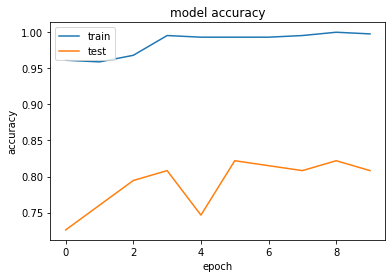

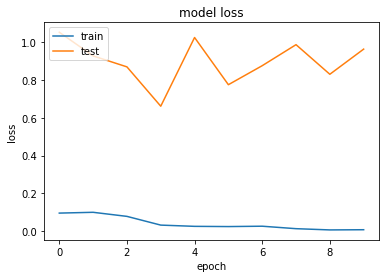

In [18]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.83      0.91      0.87        32
      GMB_02       0.86      0.56      0.68        32
      GMB_03       0.79      0.90      0.84        21
      GMB_04       0.70      0.90      0.79        29
      GMB_05       0.90      0.81      0.85        32

    accuracy                           0.81       146
   macro avg       0.82      0.82      0.81       146
weighted avg       0.82      0.81      0.80       146



In [20]:
model1.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [21]:
import cv2
import matplotlib.pyplot as plt
image1='IMG_20200814_133326_HDR.jpg'

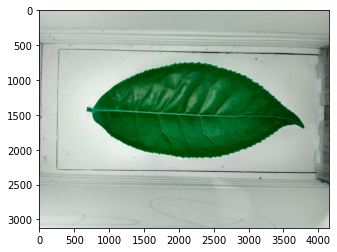

In [22]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [23]:
image_testing = Image.open('IMG_20200814_133326_HDR.jpg')
image_testing = np.array(image_testing.resize((128, 128))) / 255.0
image_testing.shape

(128, 128, 3)

In [24]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 128, 128, 3)


In [25]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[1.8617414e-01 8.3844333e-07 1.1329616e-12 8.1239706e-01 1.4279844e-03]]
['GMB_04']
